### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')

### Read the data

In [2]:
df=pd.read_csv(r"international-airline-passengers.csv",skipfooter=2)

C:\Users\cmsub\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           144 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month"]=pd.to_datetime(df["Month"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Month                                                                           144 non-null    datetime64[ns]
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df1=df.drop("Month",axis=1)
df1.columns=["volume"]
df1.index=df["Month"]
df1.head()

,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualize the data

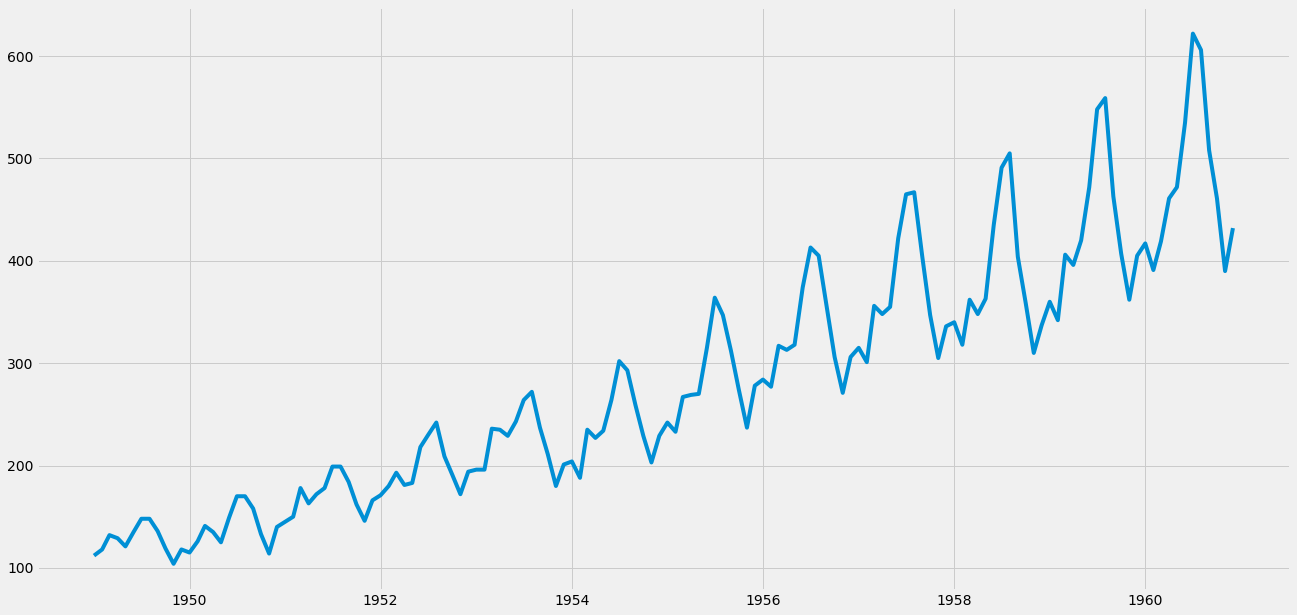

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.show()

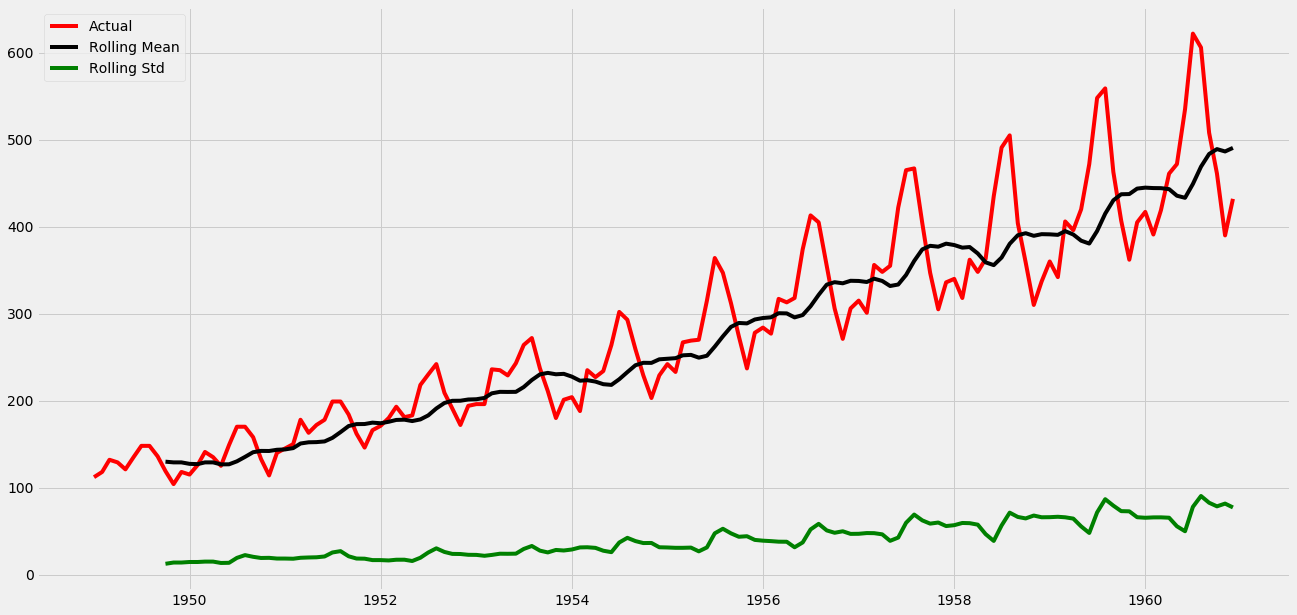

In [12]:
rolling_mean=df1.rolling(10).mean()
rolling_std=df1.rolling(10).std()
plt.figure(figsize=(20,10))
plt.plot(df1, c='r')
plt.plot(rolling_mean,c='black')
plt.plot(rolling_std,c='g')
plt.legend(["Actual", "Rolling Mean", "Rolling Std"])
plt.show()

### dicky fuller test
* pvalue>0.05 -- null hypothesis data is not stationary
* pval<0.05 -- data is stationary

In [13]:
def adfuller_test(passengers):
    result=adfuller(passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller_test(df1["volume"])

ADF Test Statistic : 0.8153688792060456
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


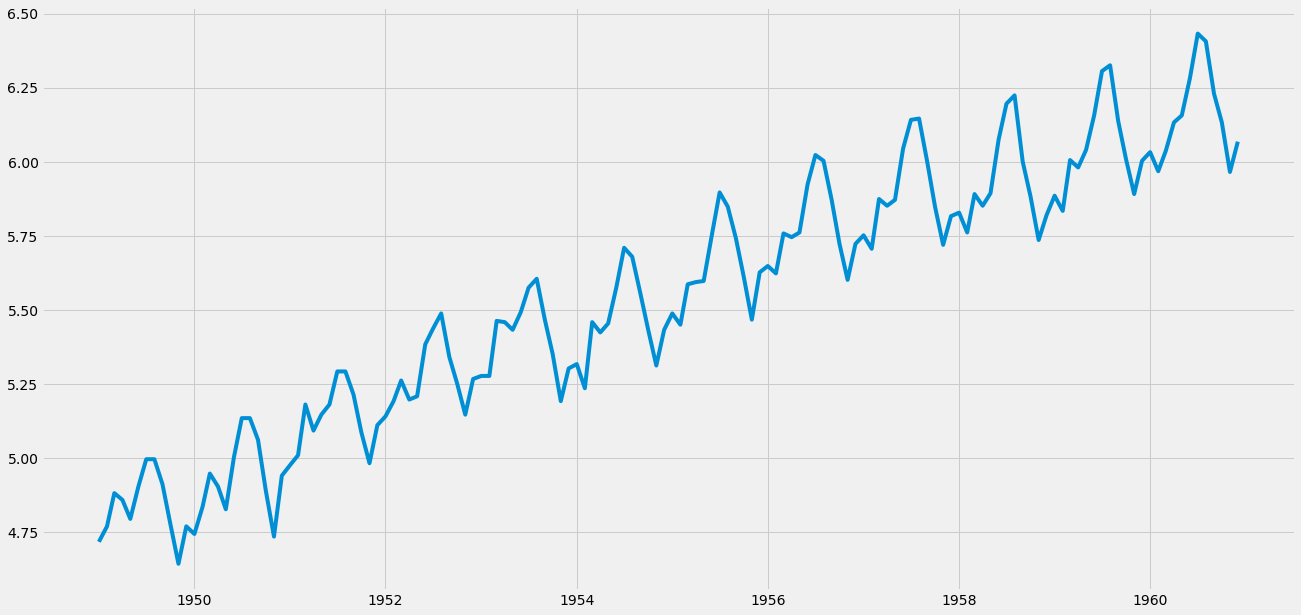

In [15]:
dflog=np.log(df1)
plt.figure(figsize=(20,10))
plt.plot(dflog)
plt.show()

### Differencing

In [16]:
dflog=dflog-dflog.shift(1)
dflog.head()

,volume
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


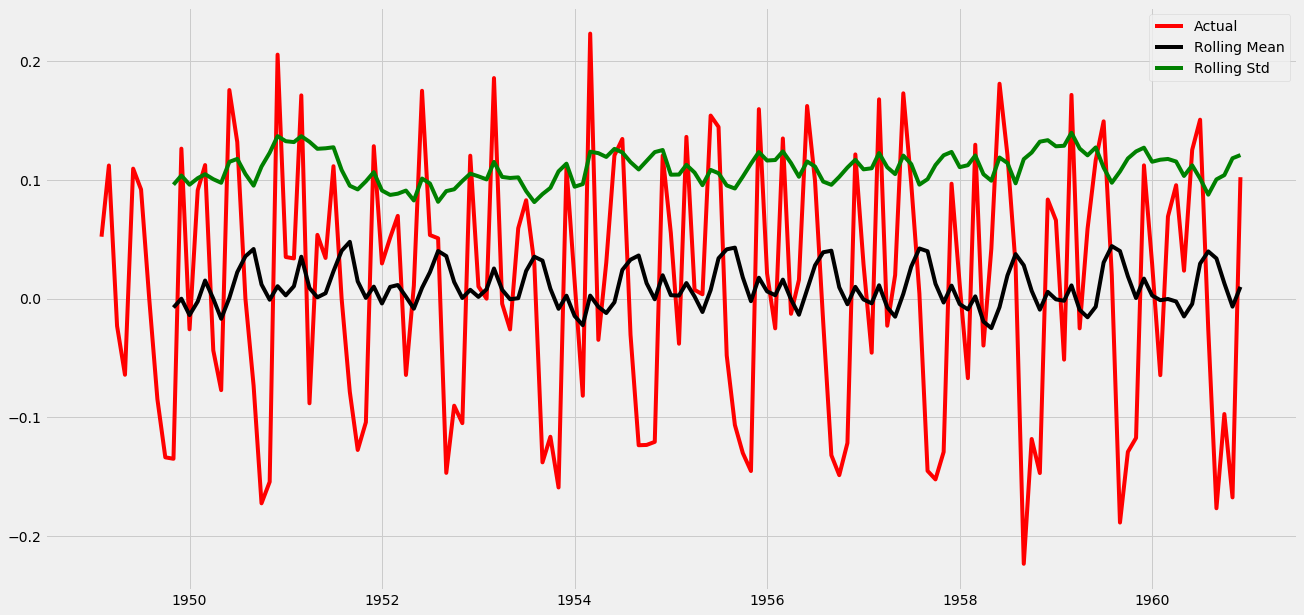

In [17]:
rolling_mean1=dflog.rolling(10).mean()
rolling_std1=dflog.rolling(10).std()
plt.figure(figsize=(20,10))
plt.plot(dflog.dropna(), c='r')
plt.plot(rolling_mean1,c='black')
plt.plot(rolling_std1,c='g')
plt.legend(["Actual", "Rolling Mean", "Rolling Std"])
plt.show()

In [18]:
adfuller_test(dflog["volume"].dropna())

ADF Test Statistic : -2.71713059838813
p-value : 0.07112054815085919
#Lags Used : 14
Number of Observations Used : 128
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
dflog=dflog.dropna()

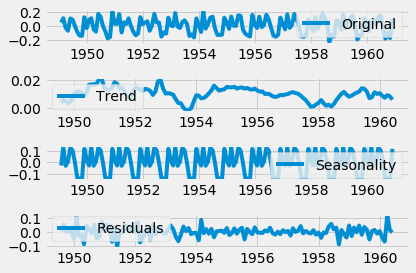

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(dflog)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(dflog, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
decomp_data=residual
decomp_data=decomp_data.dropna()
adfuller_test(decomp_data)

ADF Test Statistic : -6.745773270967344
p-value : 3.0378605466115235e-09
#Lags Used : 13
Number of Observations Used : 117
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

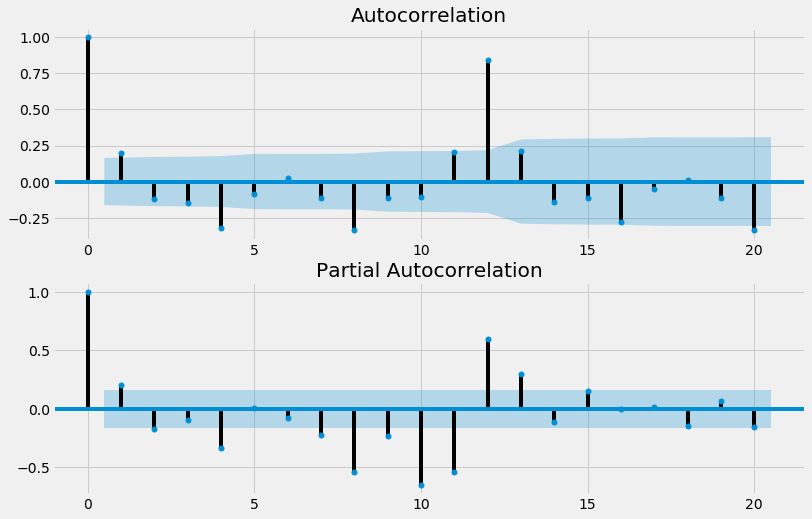

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(dflog,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(dflog,lags=20,ax=ax2, method='ols')

### ARIMA

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(df1,order=(2,1,2))
model_fit=model.fit(disp=-1)

C:\Users\cmsub\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\cmsub\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.volume   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Fri, 09 Apr 2021   AIC                           1344.043
Time:                        15:37:38   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5309      0.708      3.573      0.000       1.143       3.919
ar.L1.D.volume     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.volume    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.volume    -1.9100      0.065    -29.534      0.000      -2.037      -1.783
ma.L2.D.volume     0.9998      0.067     14.814      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [26]:
model_fit.fittedvalues

Month
1949-02-01     2.530876
1949-03-01     3.350737
1949-04-01     5.221203
1949-05-01     0.789301
1949-06-01    -1.830876
                ...    
1960-08-01   -22.954119
1960-09-01   -50.850958
1960-10-01   -49.981619
1960-11-01   -39.803456
1960-12-01   -11.473870
Length: 143, dtype: float64

In [27]:
df1['volume']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: volume, Length: 144, dtype: int64

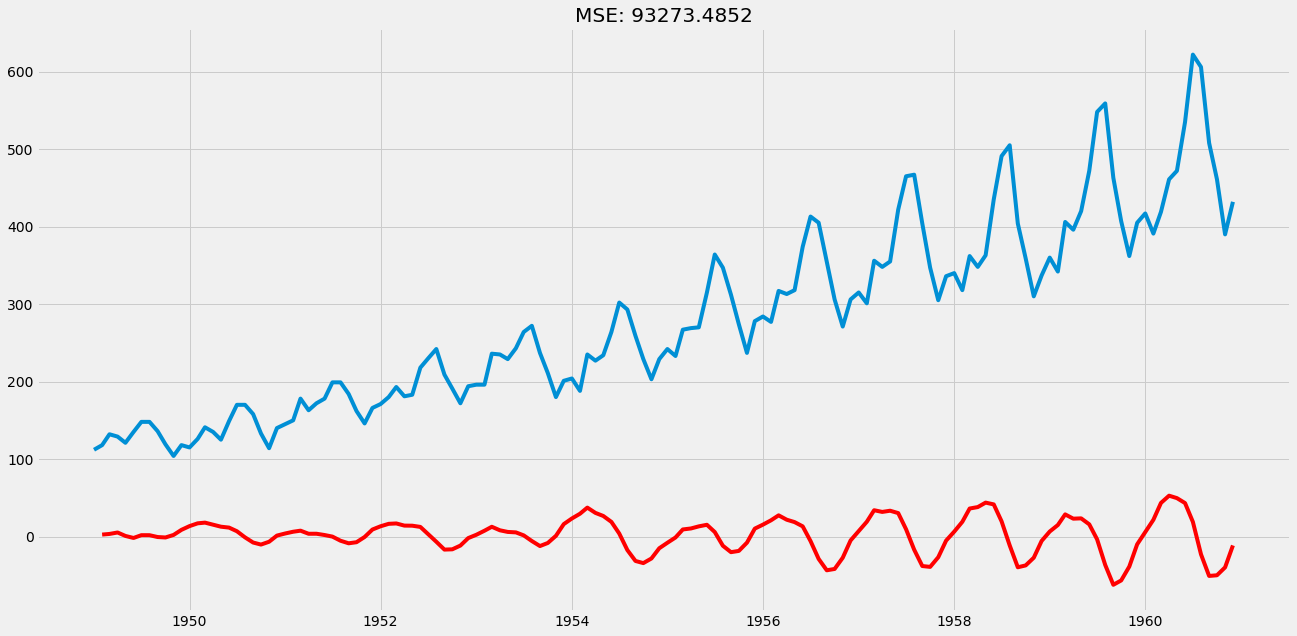

In [28]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('MSE: %.4f'% ((model_fit.fittedvalues-df1['volume'])**2).mean())
plt.show()

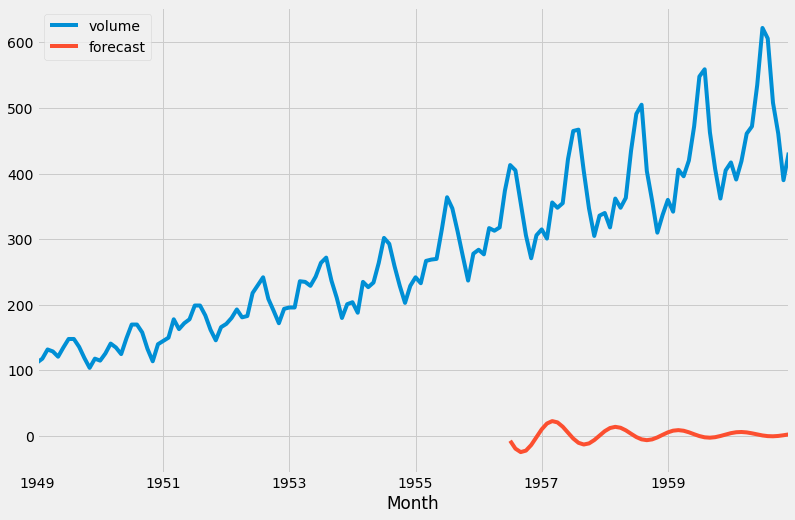

In [29]:
df1['forecast']=model_fit.predict(start=90,end=150,dynamic=True)
df1[['volume','forecast']].plot(figsize=(12,8))
plt.show()

### Seasonal ARIMA

In [30]:
import statsmodels.api as sm
import itertools

In [31]:
df1.drop("forecast", axis=1, inplace=True)

In [32]:
import warnings
warnings.filterwarnings("ignore")
model = sm.tsa.statespace.SARIMAX(df1,
                                  order=(4, 1, 1),
                                  seasonal_order=(4, 4, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              volume   No. Observations:                  144
Model:             SARIMAX(4, 1, 1)x(4, 4, [], 12)   Log Likelihood                -188.097
Date:                             Fri, 09 Apr 2021   AIC                            396.195
Time:                                     15:38:59   BIC                            413.807
Sample:                                 01-01-1949   HQIC                           402.690
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4741      0.270     -5.467      0.000      -2.003      -0.946
ar.L2         -0.5459      0.380     -1.435      0.151      -1.292       0.200
ar.L3          0.3025      0.343      0.882      0.378      -0.369       0.974
ar.L4          0.2139      0.211      1.013      0.311      -0.200       0.628
ma.L1          1.0001    236.898      0.004      0.997    -463.312     465.313
ar.S.L12      -1.2176      0.162     -7.507      0.000      -1.536      -0.900
ar.S.L24      -0.3822      0.196     -1.954      0.051      -0.766       0.001
ar.S.L36      -0.1967      0.274     -0.717      0.474      -0.735       0.341
ar.S.L48       0.1596      0.056      2.858      0.004       0.050       0.269
sigma2        29.1458   6909.278      0.004      0.997   -1.35e+04    1.36e+04
===================================================================================
Ljung-Box (Q):                       28.64   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.91   Prob(JB):                         0.66
Heteroskedasticity (H):               4.27   Skew:                            -0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

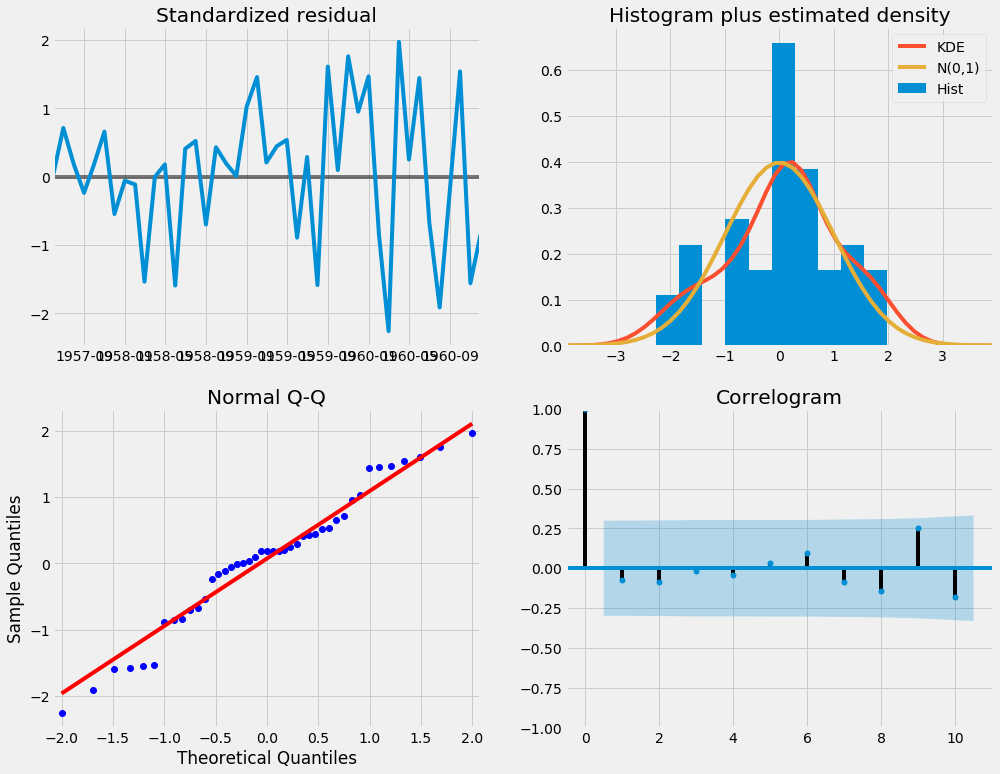

In [34]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [35]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

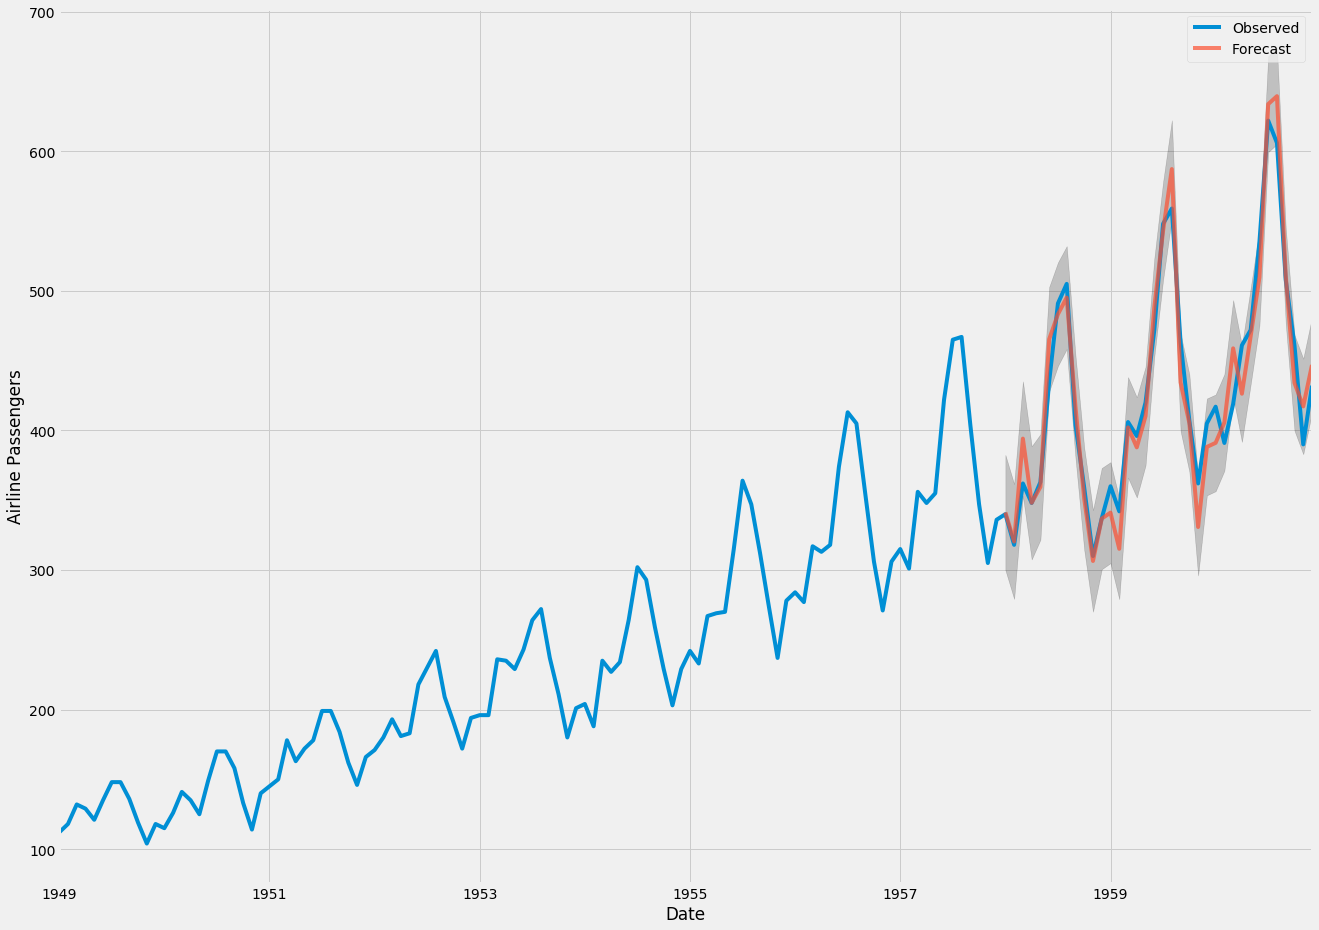

In [36]:
ax = df1['1949':].plot(figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend(['Observed','Forecast' ])

plt.show()

### Calculate mean square error

In [37]:
df1_forecasted = pred.predicted_mean
df1_original = df1['1958-01-01':]['volume']

mse = ((df1_forecasted - df1_original)**2).mean()
print('The Mean Squared Error of our forecast is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecast is 391.17


In [38]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

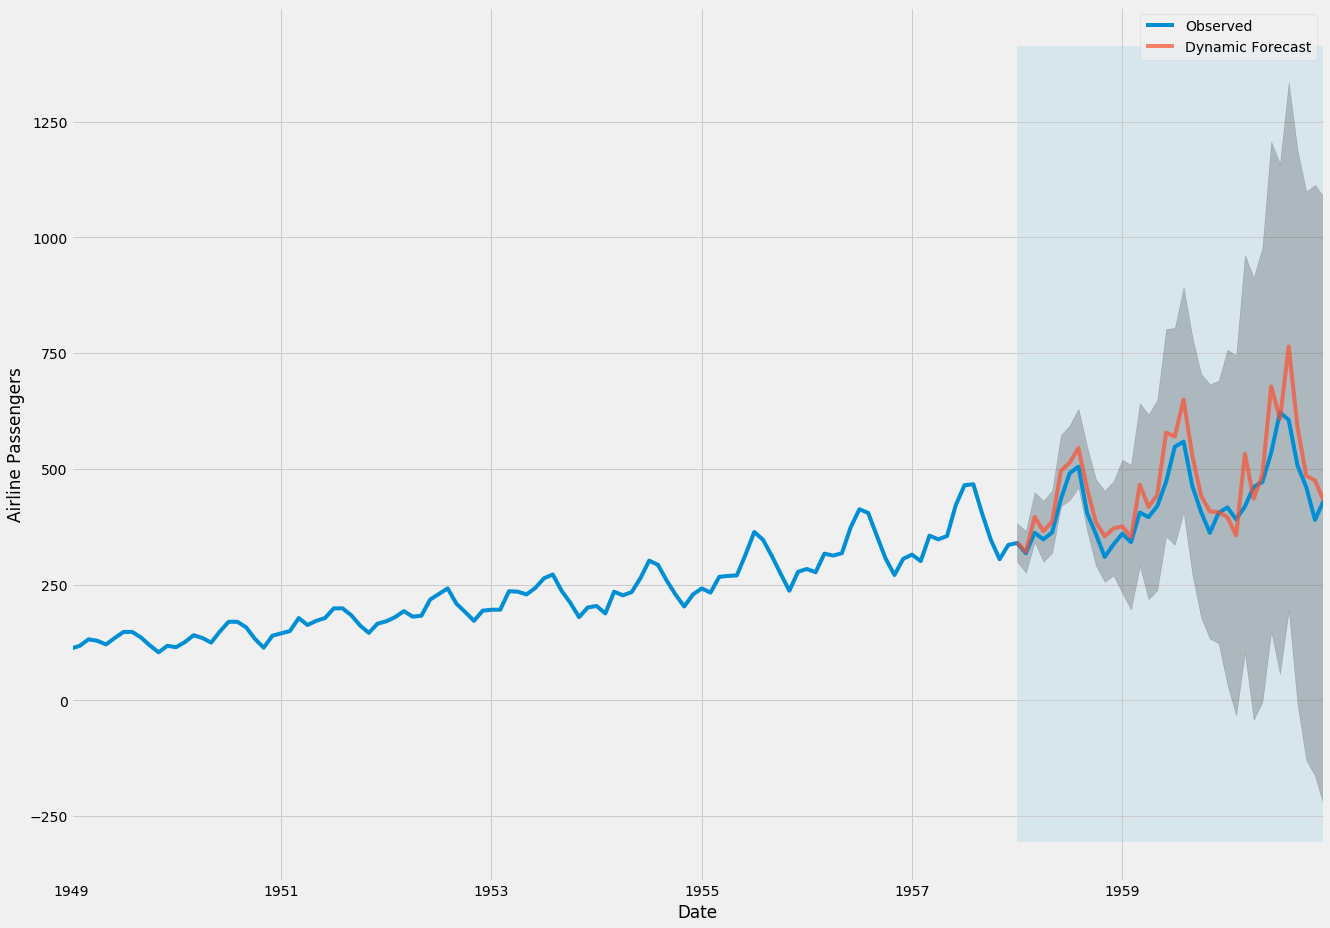

In [39]:
ax = df1['1949':].plot(figsize=(20, 15))
pred_dynamic.predicted_mean.plot(ax=ax, alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), df1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend(['Observed','Dynamic Forecast' ])

plt.show()

In [40]:
df1_forecasted = pred_dynamic.predicted_mean
df1_original = df1['1958-01-01':]['volume']

mse = ((df1_forecasted - df1_original)**2).mean()
print('The Mean Squared Error of our forecast is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecast is 3422.56


### Get forecast 24 steps ahead in future

In [41]:
pred_future = results.get_forecast(steps=24)
pred_future_ci = pred_future.conf_int()

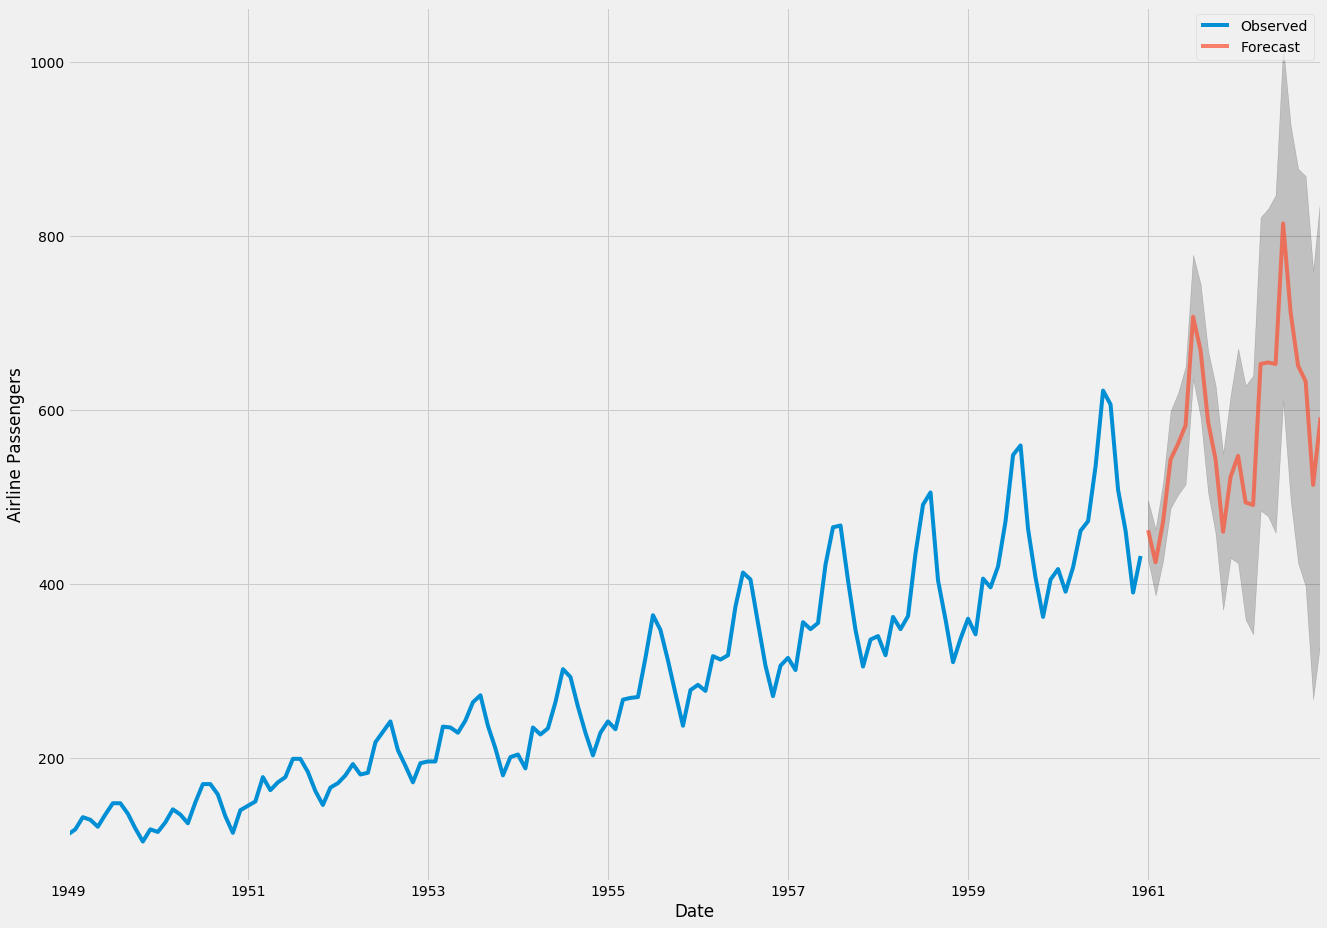

In [42]:
ax = df1['1949':].plot(figsize=(20, 15))
pred_future.predicted_mean.plot(ax=ax, alpha=.7)

ax.fill_between(pred_future_ci.index,
                pred_future_ci.iloc[:, 0],
                pred_future_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend(['Observed','Forecast' ])

plt.show()